In [13]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from core import *
import pandas as pd

In [14]:
res = 9

In [15]:
params = {
  "no_of_detectors": 5,
  "source_to_object": 12.5,
  "source_to_detector": 35,
  "size_of_object": 12,
  "no_of_rotations": 18,
  "angle_bw_detectors": 0.16188,
  "resolution": res
}

In [16]:
r = params['size_of_object'] / 2
x = params['source_to_object']
n = params['no_of_detectors']

In [17]:
theta_fan = 2 * np.arcsin(r/x)
params['angle_bw_detectors'] = theta_fan/ (n-1)

In [18]:
params

{'no_of_detectors': 5,
 'source_to_object': 12.5,
 'source_to_detector': 35,
 'size_of_object': 12,
 'no_of_rotations': 18,
 'angle_bw_detectors': 0.25032735620229407,
 'resolution': 9}

In [19]:
raw_data = pd.read_csv('./Proj_gamma_photo_peak.csv', header=None)
detector_readings = raw_data.to_numpy().T.flatten()
d = detector_readings

d.shape

(90,)

In [20]:
A = CreateInterceptMatrix(**params).create_intercept_matrix_from_lines()
A.shape

(90, 81)

In [21]:
intercepts = A.reshape(90, res, res)

In [22]:
lambdas = SolveEquation(A, d).solve(useLibrary='pinv')
img = lambdas.reshape(res, res)

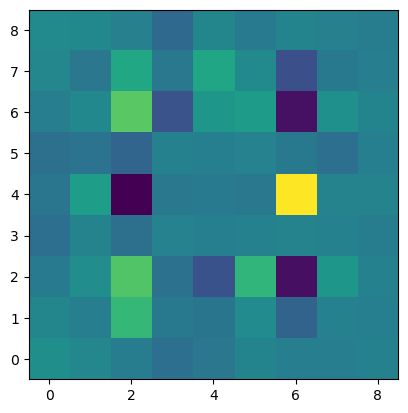

In [23]:
plt.imshow(img, origin='lower');